<a href="https://colab.research.google.com/github/spockthompson/Portfolio-Project/blob/main/Sales%20Prediction%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Project
## Sales Prediction for Food Items
- Scotty Thomason

## Loading Data

In [1]:
import pandas as pd

filename = '/content/drive/MyDrive/Colab Notebooks/02 Week 2: Pandas/sales_predictions (1).csv'

df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [2]:
df.shape

(8523, 12)

In [3]:
df.duplicated().sum()
# no duplicates 😊

0

In [4]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Fixing the description of items "Fat Content"
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
# I'm going to fill in the columns with missing values with simple "0"

df.fillna(value = 0, inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals
-Histograph, Boxplot, and Heatmap

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Item MRP')

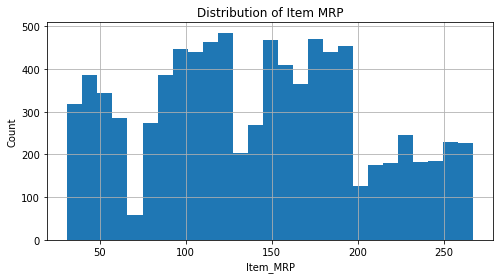

In [11]:
plt.figure(figsize=(8,4))
df['Item_MRP'].hist(bins='auto')
plt.xlabel("Item_MRP")
plt.ylabel("Count")
plt.title("Distribution of Item MRP")

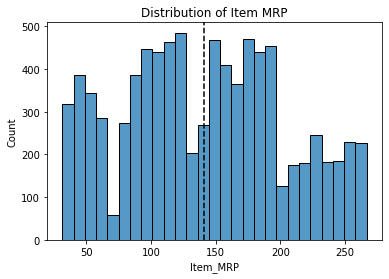

In [12]:
ax = sns.histplot(data=df, x='Item_MRP')
ax.set(title='Distribution of Item MRP');
mean = df['Item_MRP'].mean()
ax.axvline(mean,color='k', ls='--')

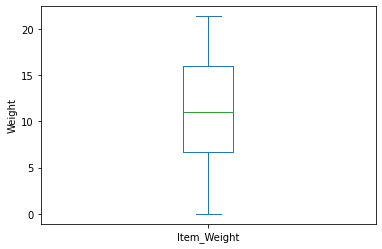

In [13]:
df['Item_Weight'].plot(kind='box')
plt.ylabel('Weight');
plt.show()

In [14]:
df['Item_Weight'].describe()

count    8523.000000
mean       10.650590
std         6.431899
min         0.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.077522,0.022859,0.520561,-0.053222
Item_Visibility,-0.077522,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022859,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.520561,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.053222,-0.128625,0.567574,-0.049135,1.000000


In [16]:
correlation = df['Item_Weight'].corr(df['Item_Outlet_Sales'])
correlation

-0.05322227785889074

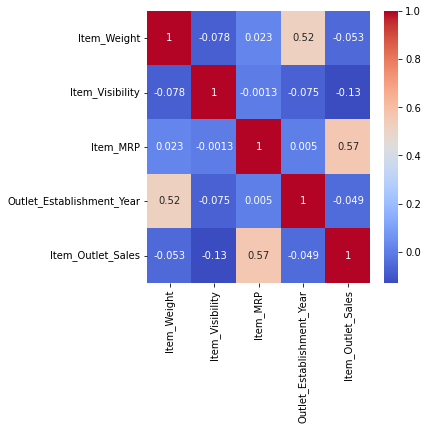

In [17]:
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='coolwarm', annot=True)

## Explanatory Visual

- Goal: Help the retailer understand the properties of products and outlets that play crucial roles in increasing sales/Help your stakeholders better understand trends in the data

In [34]:
import matplotlib as mpl

cols_to_use = ['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 
               'Outlet_Establishment_Year', 'Outlet_Size',
               'Item_Outlet_Sales']
df = df[cols_to_use].copy()
df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,Low Fat,0.016047,249.8092,1999,Medium,3735.1380
1,Regular,0.019278,48.2692,2009,Medium,443.4228
2,Low Fat,0.016760,141.6180,1999,Medium,2097.2700
3,Regular,0.000000,182.0950,1998,0,732.3800
4,Low Fat,0.000000,53.8614,1987,High,994.7052


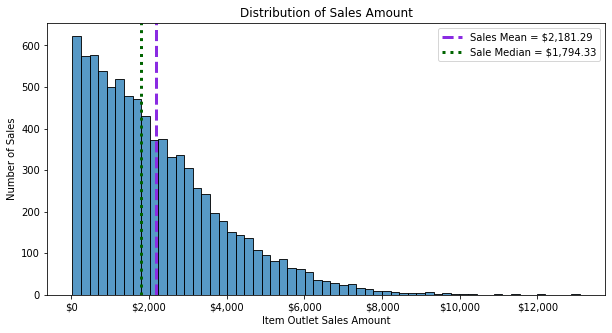

In [42]:
fig, ax = plt.subplots(figsize = (10,5))

sns.histplot(data = df, x = 'Item_Outlet_Sales', ax = ax)
ax.set(title = 'Distribution of Sales Amount');
ax.set_xlabel('Item Outlet Sales Amount')
ax.set_ylabel('Number of Sales')

mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_price, color = 'blueviolet', ls = '--', lw = 3,
           label = f'Sales Mean = ${mean_price:,.2f}');

median_price = df['Item_Outlet_Sales'].median()
ax.axvline(median_price, color = 'darkgreen', ls = ':', lw = 3,
           label = f'Sale Median = ${median_price:,.2f}');

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(price_fmt)


ax.legend();

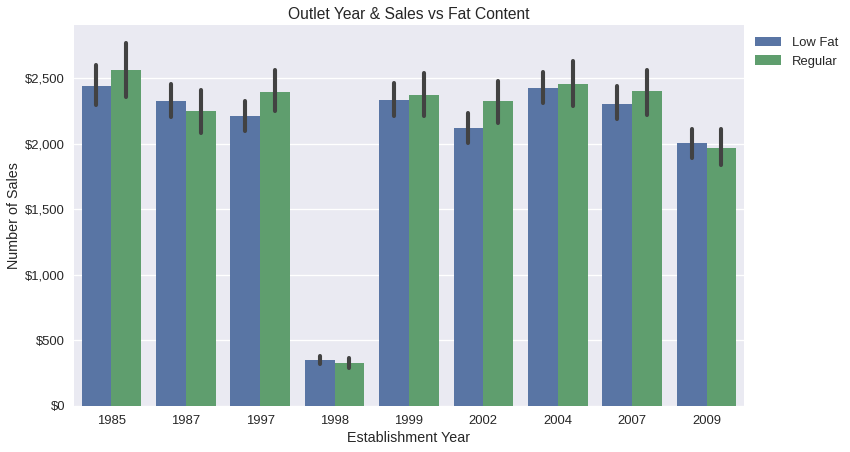

In [97]:
fig, ax = plt.subplots(figsize = (12,7))

plt.style.use('seaborn-talk')
sns.barplot(data = df, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content')

ax.set(title = 'Outlet Year & Sales vs Fat Content');
ax.set_xlabel('Establishment Year')
ax.set_ylabel('Number of Sales')

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)


ax.legend(bbox_to_anchor=(1,1));